***
____
![revit](https://i.ibb.co/bQ3dB8C/curso-revit.png)

***
***


# Clase 07
## Modelos Ensamblados

### Cargamos datos

Como es habitual lo primero que hacemos es cargar las librerías básicas.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
datos = pd.read_csv("../Dataset/caso_TC.csv").drop(["ID"], axis = 1)

In [6]:
datos.head()

,MORA60,VAR01,VAR02,VAR03,VAR04,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14
0,0,235,FAMILIAR,30,01/06/2007,93,5,3500.0,0.00,0.00,214,5,Lima,4,PROFESIONAL
1,0,18,FAMILIAR,32,01/02/2005,9,12,900.0,1824.67,1933.75,175,12,La Libertad,1,TECNICO
2,0,0,FAMILIAR,26,01/08/2003,8,2,2400.0,2797.38,188.29,187,0,Lima,0,PROFESIONAL
3,0,0,FAMILIAR,36,01/07/2003,20,12,2700.0,0.00,0.00,187,12,Ancash,0,TECNICO
4,0,0,FAMILIAR,46,01/11/2006,0,1,3100.0,2000.00,11010.65,189,0,Lima,0,TECNICO


In [7]:
objetivo = "MORA60"

# Caso mora en tarjetas de crédito

**REVITBANK** es un banco local de Perú, con una trayectoria en el mercado de más de 50 años. Sus clientes se distribuyen en banca mayorista (grandes empresas y corporaciones) y banca minorista (personas y pequeñas empresas), siendo la banca minorista el segmento que más contribuye a la utilidad del negocio (por encima del 60%).

El número de clientes de banca minorista de REVITBANK ha aumentado de forma moderada pero constante desde su creación. Sin embargo, teniendo en cuenta el crecimiento del país en los últimos años, se ha detectado un gran aumento de la demanda en tarjetas de crédito entre los clientes del banco.

## RETO INDIVIDUAL:
Teniendo en cuenta su rol de `Data Scientist` y los datos que se le han facilitado, debe realizar una presentación en
donde responda a las siguientes cuestiones:

* Identifique los clientes que tienen una alta probabilidad de mora.
* Justifique su propuesta con datos, utilizando las herramientas que considere oportunas (tablas, gráficos, etc.).
* Identifique las dos variables menos relevantes para este análisis.

## Diccionario de variables


| Variable | Descripción |
| :--- | :--- |
| ID | Identificador |
| MORA60 | Indicador mora>60 días en el transcurso de un año luego de haberle otorgado el crédito (0: No tuvo mora 60, 1: Sí tuvo mora 60). |
| VAR01 | Nro de días de atraso máximo durante los 12 meses antes de la aprobación del crédito. |
| VAR02 | Situación de la casa (alquilada, familiar, propia, otras) |
| VAR03 | Edad |
| VAR04 | Fecha ingreso al empleo. |
| VAR05 | Máxima antigüedad con Tarjeta de crédito en el Sistema Financiero (en meses). |
| VAR06 | Nro de meses con algún producto Pasivo (ahorro) durante los 12 meses antes de la aprobación del crédito. |
| VAR07 | Ingreso mensual. |
| VAR08 | Monto de Línea de crédito Tarjeta de Crédito en el Sistema Financiero. |
| VAR09 | Monto de Saldo deudor promedio total en el Sistema Financiero. |
| VAR10 | Score con el que fue aprobada la Tarjeta de crédito en el Banco. |
| VAR11 | Nro de veces con Abono de Pago de Haberes en el Banco durante los 12 meses antes de la aprobación del crédito. |
| VAR12 | Zona geográfica. |
| VAR13 | Máxima clasificación de Riesgos SBS durante los 12 meses antes de la aprobación del crédito (0: Normal, 1: CPP, 2: Deficiente, 3: Dudoso, 4: Pérdida). |
| VAR14 | Nivel educativo. |

In [8]:
datos.VAR13 = datos.VAR13.astype('category',copy=False)

In [9]:
import datetime as dt

datos.VAR04 = pd.to_datetime(datos.VAR04)
datos["anio_ingreso"] = datos.VAR04.dt.year
datos["tiemp_trab"] = 2019 - datos.anio_ingreso

In [10]:
datos = datos.drop(["VAR04", "anio_ingreso"], axis = 1)

In [11]:
datos.head()

,MORA60,VAR01,VAR02,VAR03,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14,tiemp_trab
0,0,235,FAMILIAR,30,93,5,3500.0,0.00,0.00,214,5,Lima,4,PROFESIONAL,12
1,0,18,FAMILIAR,32,9,12,900.0,1824.67,1933.75,175,12,La Libertad,1,TECNICO,14
2,0,0,FAMILIAR,26,8,2,2400.0,2797.38,188.29,187,0,Lima,0,PROFESIONAL,16
3,0,0,FAMILIAR,36,20,12,2700.0,0.00,0.00,187,12,Ancash,0,TECNICO,16
4,0,0,FAMILIAR,46,0,1,3100.0,2000.00,11010.65,189,0,Lima,0,TECNICO,13


Preprocesamos los datos 

In [12]:
# Separamos los datos numéricos y categóricos
datos_numericos = datos.select_dtypes(include=['float64', "int64"])
datos_categoricos = datos.select_dtypes(exclude=['float64', "int64"])

# Para los missing numéricos los imputamos con la media
for col in datos_numericos.columns:
    datos_numericos[col].fillna(datos_numericos[col].mean(), inplace=True)

# Para los categoricos creamos dummies
datos_categoricos_codificados = pd.get_dummies(datos_categoricos)
df_final = pd.concat([datos_numericos, datos_categoricos_codificados], axis=1)

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Separamos nuestra data en predictores y objetivo (Target)

In [13]:
X=df_final.drop(objetivo, axis=1)
y=df_final[objetivo]

Primero ajustamos los modelos ya elaborados para clasificación

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

En primer lugar vamos a evaluar los algoritmos que conocemos hasta ahora y compararlos con los distintos algoritmos de ensamblado.

In [15]:
# Creamos un contenedor para los resultados
resultados = {}

**Modelo Regresión logística**

In [16]:
from sklearn.linear_model import LogisticRegression

estimador_logis = LogisticRegression()

error_cv = cross_val_score(estimador_logis, X=X, y=y, scoring="roc_auc", cv=10).mean()

resultados["logis"] = error_cv


c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\joh

**KNN Clasificador**

In [17]:
from sklearn.neighbors import KNeighborsClassifier

estimador_knn = KNeighborsClassifier(n_neighbors=500, weights="distance")

error_cv = cross_val_score(estimador_knn, X=X, y=y, scoring="roc_auc", cv=10).mean()

resultados["knn"] = error_cv

**SVM clasificador**

In [ ]:
from sklearn.svm import SVC

estimador_svm = SVC(kernel="linear", cache_size=2000)

error_cv = cross_val_score(estimador_svm, X=X, y=y, scoring="roc_auc", cv=10).mean()

resultados["SVM"] = error_cv

**Árbol de clasificación**

In [18]:
from sklearn import tree

estimador_tree = tree.DecisionTreeClassifier(max_depth=3, class_weight="balanced")

error_cv = cross_val_score(estimador_tree, X=X, y=y, scoring="roc_auc", cv=10).mean()

resultados["tree"] = error_cv

In [19]:
pd.DataFrame.from_dict(resultados, orient='index')

,0
logis,0.740686
knn,0.677154
tree,0.688690


### Bagging

Los algoritmos de Bagging (Bootstrap aggregating) funcionan entrenando varios estimadores base y cambiando los datos de entrenamiento para cada uno. En sklearn los algoritmos de ensamblado de modelos se encuentran en el submódulo `sklearn.ensemble`. En cuanto a Bagging, sklearn tiene una versión para problemas de regresión (`BaggingRegressor`) y otra para problemas de clasificación (`BaggingClassifier`).

In [20]:
from sklearn.ensemble import BaggingRegressor, BaggingClassifier

In [21]:
print(BaggingRegressor.__doc__)

A Bagging regressor.

    A Bagging regressor is an ensemble meta-estimator that fits base
    regressors each on random subsets of the original dataset and then
    aggregate their individual predictions (either by voting or by averaging)
    to form a final prediction. Such a meta-estimator can typically be used as
    a way to reduce the variance of a black-box estimator (e.g., a decision
    tree), by introducing randomization into its construction procedure and
    then making an ensemble out of it.

    This algorithm encompasses several works from the literature. When random
    subsets of the dataset are drawn as random subsets of the samples, then
    this algorithm is known as Pasting [1]_. If samples are drawn with
    replacement, then the method is known as Bagging [2]_. When random subsets
    of the dataset are drawn as random subsets of the features, then the method
    is known as Random Subspaces [3]_. Finally, when base estimators are built
    on subsets of both sam

In [22]:
estimador_bagging_10 = BaggingClassifier(n_estimators=10)
error_cv = cross_val_score(estimador_bagging_10, X=X, y=y, scoring="roc_auc", cv=10).mean()

resultados["bagging_arbol_10"] = error_cv
error_cv

0.6898599999999999

Aumentar el número de estimadores base es una forma limitada pero sencilla de mejorar el funcionamiento del modelo

In [23]:
estimador_bagging_100 = BaggingClassifier(n_estimators=50)
error_cv = cross_val_score(estimador_bagging_100, X=X, y=y, scoring="roc_auc", cv=10).mean()

resultados["bagging_arbol_100"] = error_cv
error_cv

0.7419619047619047

`BaggingRegressor` utiliza árboles de decisión como estimador base por defecto, sin embargo podemos utilizar uno distinto mediante el parámetro `base_estimator`.

In [24]:
estimador_bagging_logist = BaggingClassifier(n_estimators=10, base_estimator=LogisticRegression())
error_cv = cross_val_score(estimador_bagging_logist, X=X, y=y, scoring="roc_auc", cv=10).mean()

resultados["bagging_logis"] = error_cv
error_cv

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\joh

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\joh

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\joh

0.7397009523809523

En su momento vimos que existe un tipo de arbol de decision completamente aleatorio (Extremely Randomized Trees) que deciden la particion en cada nodo al azar. Vemos que al agrupar muchos de estos estimadores que son débiles (aun que mejores que tirar una moneda al azar, ya que un árbol de decision aleatorio aun asi aprende a separar los elementos), la varianza general se reduce ya que la que aporta un arbol se complementa con la del de al lado.

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

estimador_bagging_treerand = BaggingClassifier(n_estimators=100, base_estimator=ExtraTreesClassifier())
error_cv = cross_val_score(estimador_bagging_treerand, X=X, y=y, scoring="roc_auc", cv=10).mean()

resultados["bagging_extra_arbol"] = error_cv
error_cv

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10

0.7503276190476191

### Boosting

Los algoritmos de boosting intentan mejorar los estimadores base asignando pesos en funcion de su funcionamiento individual. El algoritmo clásico de boosting es `AdaBoost`, que se encuentra en sklearn como `AdaBoostRegressor` y `AdaBoostClassifier`.

In [26]:
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier

In [27]:
print(AdaBoostRegressor.__doc__)

An AdaBoost regressor.

    An AdaBoost [1] regressor is a meta-estimator that begins by fitting a
    regressor on the original dataset and then fits additional copies of the
    regressor on the same dataset but where the weights of instances are
    adjusted according to the error of the current prediction. As such,
    subsequent regressors focus more on difficult cases.

    This class implements the algorithm known as AdaBoost.R2 [2].

    Read more in the :ref:`User Guide <adaboost>`.

    Parameters
    ----------
    base_estimator : object, optional (default=None)
        The base estimator from which the boosted ensemble is built.
        Support for sample weighting is required. If ``None``, then
        the base estimator is ``DecisionTreeRegressor(max_depth=3)``

    n_estimators : integer, optional (default=50)
        The maximum number of estimators at which boosting is terminated.
        In case of perfect fit, the learning procedure is stopped early.

    learning_r

In [28]:
estimador_adaboost = AdaBoostClassifier(n_estimators=100)

error_cv = cross_val_score(estimador_adaboost, X=X, y=y, scoring="roc_auc", cv=10).mean()

resultados["adaboost_100"] = error_cv
error_cv

0.7639142857142858

### Gradient Boosting (GBRT)

Otro algoritmo de Boosting es Gradient Boosting que a cada iteración usa el algoritmo de Descenso de Gradiente (que veremos en el futuro) para a cada iteración , entrenar un estimador nuevo que minimiza la función de error (*loss function*) del modelo.

Scikit-learn implementa el algoritmo de (Gradient Boosted Regression Trees), que usa árboles de decisión como estimadores base, en [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) y [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

Gradient Boosting puede usar cualquier funcion de error siempre que sea diferenciable.

In [29]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [30]:
print(GradientBoostingRegressor.__doc__)

Gradient Boosting for regression.

    GB builds an additive model in a forward stage-wise fashion;
    it allows for the optimization of arbitrary differentiable loss functions.
    In each stage a regression tree is fit on the negative gradient of the
    given loss function.

    Read more in the :ref:`User Guide <gradient_boosting>`.

    Parameters
    ----------
    loss : {'ls', 'lad', 'huber', 'quantile'}, optional (default='ls')
        loss function to be optimized. 'ls' refers to least squares
        regression. 'lad' (least absolute deviation) is a highly robust
        loss function solely based on order information of the input
        variables. 'huber' is a combination of the two. 'quantile'
        allows quantile regression (use `alpha` to specify the quantile).

    learning_rate : float, optional (default=0.1)
        learning rate shrinks the contribution of each tree by `learning_rate`.
        There is a trade-off between learning_rate and n_estimators.

    n_e

In [31]:
estimador_gradientboost = GradientBoostingClassifier(n_estimators=100, loss='deviance')

error_cv = cross_val_score(estimador_gradientboost, X=X, y=y, scoring="roc_auc", cv=10).mean()

resultados["gradientboost_100"] = error_cv
error_cv

0.7745019047619048

Como cualquier estimador basado en árboles, `GradientBoostRegressor` nos permite ver la importancia de las variables en el modelo final.

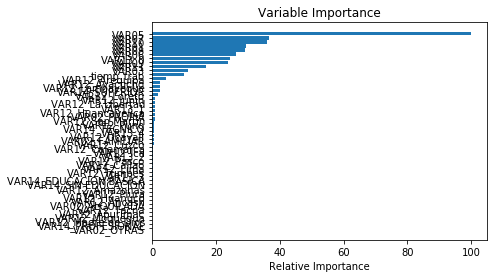

In [32]:
estimador_gradientboost.fit(X, y)
importancia_variables = estimador_gradientboost.feature_importances_
importancia_variables = 100.0 * (importancia_variables / importancia_variables.max())
sorted_idx = np.argsort(importancia_variables)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, importancia_variables[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Bosques Aleatorios (Random Forests)

El algoritmo de Bosques Aleatorios funciona mediante la creación de árboles de decision entrenados en un subgrupo aleatorio de variables.

In [33]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [34]:
print(RandomForestRegressor.__doc__)

A random forest regressor.

    A random forest is a meta estimator that fits a number of classifying
    decision trees on various sub-samples of the dataset and uses averaging
    to improve the predictive accuracy and control over-fitting.
    The sub-sample size is always the same as the original
    input sample size but the samples are drawn with replacement if
    `bootstrap=True` (default).

    Read more in the :ref:`User Guide <forest>`.

    Parameters
    ----------
    n_estimators : integer, optional (default=10)
        The number of trees in the forest.

        .. versionchanged:: 0.20
           The default value of ``n_estimators`` will change from 10 in
           version 0.20 to 100 in version 0.22.

    criterion : string, optional (default="mse")
        The function to measure the quality of a split. Supported criteria
        are "mse" for the mean squared error, which is equal to variance
        reduction as feature selection criterion, and "mae" for the mean

La implementación de scikit-learn de RandomForest hace que cada árbol se entrene en base a un dataset del mismo tamaño que el original (con reemplazo si se usa la opción `bootstrap=True`).

En cuanto al criterio para evaluar la calidad de la separación de un node de cada árbol base, para la implementación de Regresion, `RandomForestRegressor` usa el error medio cuadrático `mse` por defecto.

In [35]:
estimador_randomforest = RandomForestClassifier(n_estimators=100)

error_cv = cross_val_score(estimador_randomforest, X=X, y=y, scoring="roc_auc", cv=10).mean()

resultados["randomforest_100"] = error_cv
error_cv

0.7633142857142857

In [38]:
resultados

{'logis': 0.7406857142857144,
 'knn': 0.6771542857142856,
 'tree': 0.6886895238095239,
 'bagging_arbol_10': 0.6898599999999999,
 'bagging_arbol_100': 0.7419619047619047,
 'bagging_logis': 0.7397009523809523,
 'bagging_extra_arbol': 0.7503276190476191,
 'adaboost_100': 0.7639142857142858,
 'gradientboost_100': 0.7745019047619048,
 'randomforest_100': 0.7633142857142857}

### XGBoost

XGBoost (eXtreme Gradient Boosting) es un algoritmo de boosting relativamente nuevo que tiene bastante acogida. Es una implementación de Gradient Boosted Trees pero enfocado a datasets grandes.

Al ser muy nuevo (el proyecto se creó en 2014 y el paper se publicó en 2016, [éste es el paper](https://arxiv.org/abs/1603.02754)) no está implementado en scikit-learn, sin embargo existe en el paquete [xgboost](http://xgboost.readthedocs.io/en/latest/python/python_intro.html), que proporciona estimadores en base a dicho algoritmo que son compatibles con sklearn.

Podemos instalar `xgboost` de conda-forge para Os y Mac, para windows visitemos la página:
[XGBOOST Win](https://stackoverflow.com/questions/35139108/how-to-install-xgboost-in-anaconda-python-windows-platform/35139185)

In [1]:
from xgboost import XGBClassifier

In [2]:
print(XGBClassifier.__doc__)

Implementation of the scikit-learn API for XGBoost classification.

    Parameters
    ----------
    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    n_estimators : int
        Number of boosted trees to fit.
    silent : boolean
        Whether to print messages while running boosting.
    objective : string or callable
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    booster: string
        Specify which booster to use: gbtree, gblinear or dart.
    nthread : int
        Number of parallel threads used to run xgboost.  (Deprecated, please use ``n_jobs``)
    n_jobs : int
        Number of parallel threads used to run xgboost.  (replaces ``nthread``)
    gamma : float
        Minimum loss reduction required to make a further partition on a leaf node of the tree.
    min_child_weight : int
        Mini

In [19]:
estimador_xgboost = XGBClassifier(n_estimators=100)

error_cv = cross_val_score(estimador_xgboost, X=X, y=y, 
                scoring="roc_auc", cv=10).mean()

resultados["xgboost_100"] = error_cv
error_cv

0.7751695238095239

In [20]:
from xgboost import plot_importance, to_graphviz
estimador_xgboost.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Cuando tenemos un modelo entrenado, podemos ver la importancia de las variables en partir los árboles mediante el método `plot_importance`

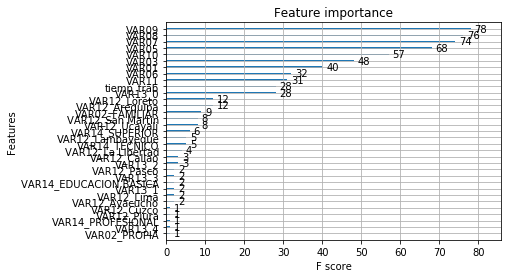

In [21]:
plot_importance(estimador_xgboost)

El método `to_graphviz` imprime un árbol en concreto (pasandole el parámetro `rankdir='LR'` lo imprime en horizontal).

In [22]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Alfy/Downloads/graphviz-2.38/release/bin'

In [24]:
to_graphviz(estimador_xgboost, num_trees=10, rankdir='LR')

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

Como vemos, el output de un árbol no está en la misma escala que las predicciones (la variable objetivo tiene el rango 5-50), esto es así por que en el algoritmo XGBoost cada árbol se basa en el output del árbol anterior, intentando corregir el error producido por el mismo.

### Stacking

El algoritmo de stacking simplemente usa el output (generalmente en terminos de probabilidades para casos de clasificacion o de las predicciones en casos de regresión) de múltiples modelos como input para un nuevo *metamodelo*.

scikit learn no tiene un estimador de stacking por defecto, sin embargo, podemos usar el  estimador de stacking (`StackingRegressor`) de [mlxtend](https://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/), una librería que amplia las funcionalidades de `sklearn`

Podemos instalar mlxtend asi:

In [42]:
# !conda install -y -c conda-forge mlxtend

In [43]:
from mlxtend.classifier import StackingClassifier

In [44]:
print(StackingClassifier.__doc__)

A Stacking classifier for scikit-learn estimators for classification.

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
        A list of classifiers.
        Invoking the `fit` method on the `StackingClassifer` will fit clones
        of these original classifiers that will
        be stored in the class attribute
        `self.clfs_`.
    meta_classifier : object
        The meta-classifier to be fitted on the ensemble of
        classifiers
    use_probas : bool (default: False)
        If True, trains meta-classifier based on predicted probabilities
        instead of class labels.
    average_probas : bool (default: False)
        Averages the probabilities as meta features if True.
    verbose : int, optional (default=0)
        Controls the verbosity of the building process.
        - `verbose=0` (default): Prints nothing
        - `verbose=1`: Prints the number & name of the regressor being fitted
        - `verbose=2`: Prints info about the p

Por ejemplo, podemos usar los estimadores ensamblados que hemos creado en este notebook para crear un nuevo estimador. Dicho estimador no tiene garantizado un funcionamiento mejor que el mejor de los estimadores que usa como input.

In [45]:
estimador_stacking = StackingClassifier(
    classifiers=[
        BaggingClassifier(n_estimators=100),
        AdaBoostClassifier(n_estimators=100),
        GradientBoostingClassifier(n_estimators=100),
        RandomForestClassifier(n_estimators=100)
    ], 
    meta_classifier=XGBClassifier(n_estimators=100))


error_cv = cross_val_score(estimador_stacking, X=X, y=y, scoring="roc_auc", cv=10).mean()

resultados["stacking"] = error_cv

error_cv

0.62

In [46]:
resultados

{'logis': 0.7297523809523809,
 'knn': 0.6771542857142856,
 'tree': 0.6886895238095239,
 'bagging_arbol_10': 0.7097380952380952,
 'bagging_arbol_100': 0.7350399999999999,
 'bagging_logis': 0.7391638095238094,
 'bagging_extra_arbol': 0.7484533333333334,
 'adaboost_100': 0.7639142857142858,
 'gradientboost_100': 0.7745114285714286,
 'randomforest_100': 0.7605152380952381,
 'xgboost_100': 0.7751695238095239,
 'stacking': 0.62}